In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_csv("fcc-forum-pageviews.csv").set_index("date")
df.index = pd.to_datetime(df.index)

df = df[(df.value < df.value.quantile(.975)) & (df.value > df.value.quantile(.025))]

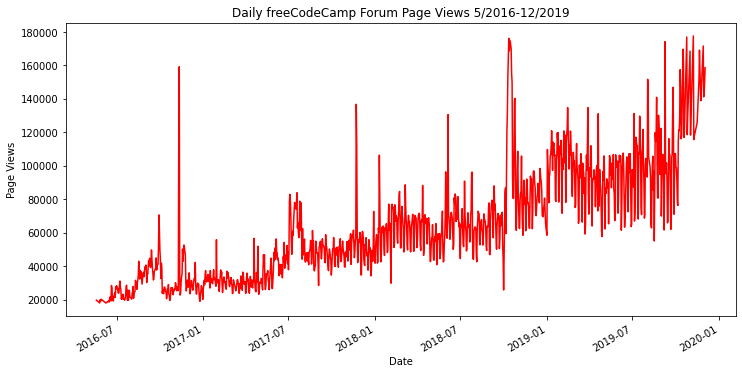

In [59]:
fig = df.plot(figsize=(12,6), c='r', title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019', xlabel='Date', ylabel='Page Views', legend=False)

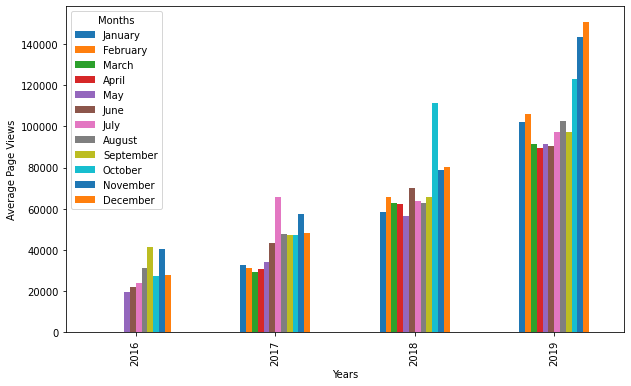

In [44]:
df_bar = df.copy()
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month
df_plot = df_bar.groupby([df.index.year,df.index.month],)['value'].agg(np.mean).rename_axis(['year','month']).reset_index()
df_plot = pd.pivot_table(df_plot, values='value', index='year', columns='month')

ax = df_plot.plot(kind='bar')
fig = ax.get_figure()
fig.set_size_inches(10,6)
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December',],  title="Months")

Text(0.5, 1.0, 'Month-Wise Box Plot (Seasonality)')

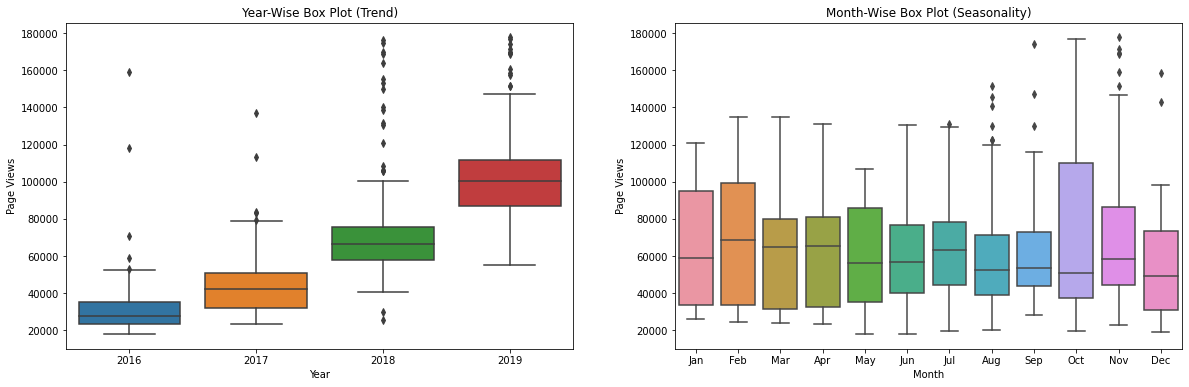

In [57]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

fig, axis = plt.subplots(1,2)
fig.set_size_inches(20,6)
sns.boxplot(x=df_box['year'], y=df_box['value'], ax=axis[0]).set(ylabel='Page Views', xlabel='Year')
sns.boxplot(x=df_box['month'], y=df_box['value'], order=['Jan','Feb','Mar','Apr','May','Jun',
                                                         'Jul','Aug','Sep','Oct','Nov','Dec'], ax=axis[1]).set(ylabel='Page Views', xlabel='Month',)
axis[0].set_title('Year-Wise Box Plot (Trend)')
axis[1].set_title('Month-Wise Box Plot (Seasonality)')